# Problem Set 3

### Before You Start

This problem set is fun but challenging. It's going to involve a good amount of debugging and head-scratching, so try to start sooner rather than later!

This problem set has three parts:

- **Part I**: Experimental Setup
- **Part II**: Nearest Neighbor and Cross-Validation
- **Part III**: Overfitting in Model Selection and Nested Cross Validation

For part I and II we'll consider a regression problem. You should *not* be using any built-in ML libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! For these two first parts we will be working with a modified version of the California Housing Dataset that you can download from bcourses (`cal_housing_data_clean.csv`). Part I will be relatively easy; Part II will take more time.

For part III we'll consider a classification problem. You'll be able to use Python ML built-in libraries (in particular scikit-learn). We'll not be using the California Housing Dataset but rather synthetic data that you'll generate yourself. 

Make sure the following libraries load correctly before starting (hit Ctrl-Enter).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction to the assignment

For this assignment, you will be using a version of the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) with additional information. Use the following commands to load the information in the csv file provided with the assignment in bcourses (`cal_housing_data_clean.csv`). Take some time to explore the data. 

In [8]:
# load Cal data set

cal_df = pd.read_csv('cal_housing_data_clean.csv')
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','DistCoast','Inland']
target = 'MedHouseVal'

cal_df.shape

(20640, 9)

In [46]:
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal
0,3.6885,49,5.184569,1.052950,2363,3.574887,4205.460788,0,2.540
1,3.5444,12,4.786854,1.027230,2029,1.905164,72365.363970,1,1.325
2,4.2011,9,6.045161,1.038710,1955,3.153226,166848.071800,1,1.081
3,3.1630,26,4.267241,0.961207,719,3.099138,28060.624020,0,1.794
4,4.6197,21,3.701933,1.019329,1489,1.514751,5593.110112,0,3.875


---

# Part I: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for census block groups.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function  to compute RMSE, other than numpy functions like `sqrt` and if needed, `sum` or other relevant ones.

In [20]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
y_hat : array
    numpy array of numerical values corresponding to predictions for each of the N observations

y : array
    numpy array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction (round to 2 decimal places)

Example
-------
>>> print(compute_rmse((4,6,3),(2,1,4)))
3.16
"""
def compute_rmse(y_hat, y):
    return round(np.sqrt(np.sum([x**2 for x in np.array(y_hat)-np.array(y)])/len(y)),6)


In [21]:
print(compute_rmse((4,6,3),(2,1,4)))

3.162278


### 1.2 Divide your data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "cal_df_train"), and place the remaining 25% in a testing dataset (call this "cal_df_test"). Do not use built-in functions.

To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [216]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1948)


train_perc = .75
train_num = int(cal_df.shape[0]*train_perc)
test_num = len(cal_df)-train_num

ids = np.arange(0,cal_df.shape[0],1)
np.random.shuffle(ids)

cal_df_train = cal_df.iloc[ids][test_num:]
cal_df_test = cal_df.iloc[ids][:test_num]

cal_df_train.shape

(15480, 9)

### 1.3 Use a baseline for prediction, and compute RMSE 

Let's start by creating a very bad baseline model that predicts median house values as the average of `MedHouseVal`.

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set**.

Once the model is built, do the following:

1. Report the RMSE of the training set and report it.
2. Report the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in gold. Make sure to label your axes appropriately, and add a legend to your figure.

1.
The RMSE of the training set is 1.159684
2.
The RMSE of the test set is 1.136555
3.
The difference betwenn RMSE of train and test set is 0.023128999999999955
The RMSE of test dataset is lower than that of training, which is not what I expected.
Usually the test RMSE would be higher.
This might due to underfitting as our model is very simplistic,
it is likely that the model fail to capture the pattern in training set, i.e. bias is high.
Hence we observe this strange pattern in RMSE.
4.
It took 8.510000770911574e-05 seconds to compute the predicted values
It is very close to 0 since we are only computing one constant
5.


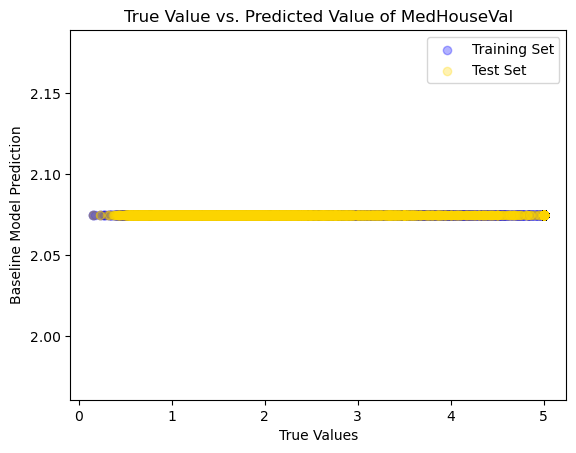

In [217]:
import time
# baseline model 1
def base_model(covariates):
    length = covariates.shape[0]
    pred = np.mean(cal_df_train[target])
    return np.full(length, pred)

def base_model_t(covariates):
    length = covariates.shape[0]
    start_time = time.perf_counter()
    pred = np.full(length, np.mean(cal_df_train[target]))
    duration = time.perf_counter()-start_time
    print(f'It took {duration} seconds to compute the predicted values')
    return pred

# 1.
train_pred = base_model(cal_df_train[features])
RMSE_train_base = compute_rmse(train_pred,cal_df_train[target])
print('1.')
print(f'The RMSE of the training set is {RMSE_train_base}')

# 2.
test_pred = base_model(cal_df_test[features])
RMSE_test_base = compute_rmse(test_pred,cal_df_test[target])
print('2.')
print(f'The RMSE of the test set is {RMSE_test_base}')

# 3.
RMSE_diff = RMSE_train_base - RMSE_test_base
print('3.')
print(f'The difference betwenn RMSE of train and test set is {RMSE_diff}')
print('The RMSE of test dataset is lower than that of training, which is not what I expected.')
print('Usually the test RMSE would be higher.')
print('This might due to underfitting as our model is very simplistic,')
print('it is likely that the model fail to capture the pattern in training set, i.e. bias is high.')
print('Hence we observe this strange pattern in RMSE.')
      
# 4.
print('4.')
test_pred = base_model_t(cal_df_test[features])
print('It is very close to 0 since we are only computing one constant')

# 5.
print('5.')
plt.scatter(cal_df_train[target], train_pred, color = 'blue',label = 'Training Set',alpha = 0.3)
plt.scatter(cal_df_test[target], test_pred, color = 'gold',label = 'Test Set',alpha = 0.3)

plt.legend()
plt.title("True Value vs. Predicted Value of MedHouseVal")
plt.xlabel("True Values")
plt.ylabel("Baseline Model Prediction")

plt.show()


### 1.4 Use another baseline for prediction, and compute RMSE [extra-credit]

Now consider a baseline model that predicts median house values as the averages of `MedHouseVal` based on whether the census block is adjacent to the coast or inland (note that the `Inland` feature is already computed and ready for you).

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set** that have the same adjacency value.

For example, for an input observation where `Inland==1`, the model should predict the `MedHouseVal` as the average of all `MedHouseVal` values in the training set that also have `Inland==1`.

Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in gold. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
6. Compare this results to those obtained in 1.3. Is coast adjacency improving the predictions? 

*Note:* The `groupby` operation might come handy here.

1.
The RMSE of the training set is 1.017589
2.
The RMSE of the test set is 0.983681
3.
The difference betwenn RMSE of train and test set is 0.03390800000000005
The RMSE of test dataset is lower than that of training, which is not what I expected.
Usually the test RMSE would be higher.
This might due to underfitting as our model is very simplistic,
it is likely that the model fail to capture the pattern in training set, i.e. bias is high.
Hence we observe this strange pattern in RMSE.
4.
It took 0.000671899993903935 seconds to compute the predicted values
It is very close to 0 since we are only computing two constants
5.


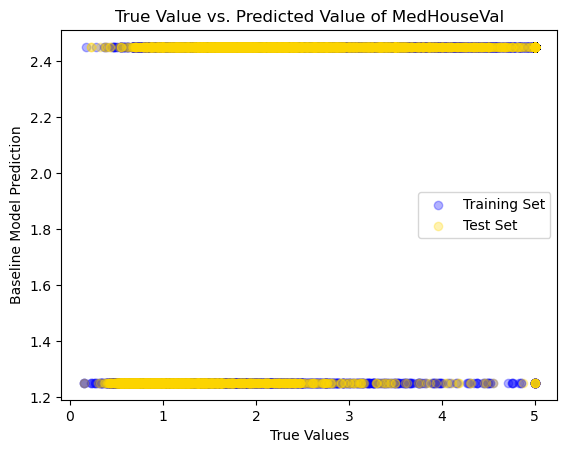

6.
Comparing the RMSE of the new model to what I got in 1.3,
coast adjacency is improving the predictions since RMSE is lower in both training prediction and test prediction.


In [225]:
import time
# baseline model 2
def base_model_2(covariates):
    Inland_pred = cal_df_train.groupby(['Inland'])[target].mean()
    
    pred = covariates['Inland'].map({0: Inland_pred[0], 1: Inland_pred[1]})

    return pred

def base_model_2_t(covariates):
    Inland_pred = cal_df_train.groupby(['Inland'])[target].mean()

    start_time = time.perf_counter()
    pred = covariates['Inland'].map({0: Inland_pred[0], 1: Inland_pred[1]})
    duration = time.perf_counter()-start_time
    print(f'It took {duration} seconds to compute the predicted values')

    return pred

# 1.
train_pred = base_model_2(cal_df_train[features])
RMSE_train_base = compute_rmse(train_pred,cal_df_train[target])
print('1.')
print(f'The RMSE of the training set is {RMSE_train_base}')

# 2.
test_pred = base_model_2(cal_df_test[features])
RMSE_test_base = compute_rmse(test_pred,cal_df_test[target])
print('2.')
print(f'The RMSE of the test set is {RMSE_test_base}')

# 3.
RMSE_diff = RMSE_train_base - RMSE_test_base
print('3.')
print(f'The difference betwenn RMSE of train and test set is {RMSE_diff}')
print('The RMSE of test dataset is lower than that of training, which is not what I expected.')
print('Usually the test RMSE would be higher.')
print('This might due to underfitting as our model is very simplistic,')
print('it is likely that the model fail to capture the pattern in training set, i.e. bias is high.')
print('Hence we observe this strange pattern in RMSE.')
      
# 4.
print('4.')
test_pred = base_model_2_t(cal_df_test[features])
print('It is very close to 0 since we are only computing two constants')

# 5.
print('5.')
plt.scatter(cal_df_train[target], train_pred, color = 'blue',label = 'Training Set',alpha = 0.3)
plt.scatter(cal_df_test[target], test_pred, color = 'gold',label = 'Test Set',alpha = 0.3)

plt.legend()
plt.title("True Value vs. Predicted Value of MedHouseVal")
plt.xlabel("True Values")
plt.ylabel("Baseline Model Prediction")

plt.show()

print('6.')
print('Comparing the RMSE of the new model to what I got in 1.3,')
print('coast adjacency is improving the predictions since RMSE is lower in both training prediction and test prediction.')

---

# Part II: Nearest Neighbors and Cross-Validation
Let's try and build a machine learning algorithm to beat the "Average Values" baselines that you computed above. Your next task is to implement a basic nearest neighbor algorithm from scratch. 

### 2.1 Nearest Neighbors: Normalization

Create normalized analogues of all the features in both the training and test datasets. Recall that this involves substracting the **training** mean and dividing by the **training** standard deviation. 

Include the normalized features as additional columns in the train an test dataframes and call them 
`MedIncNorm, HouseAgeNorm, AveRoomsNorm, AveBedrmsNorm, PopulationNorm, AveOccupNorm, DistCoastNorm and InlandNorm` respectively.

In [235]:
norm_mean = cal_df_train.mean()
norm_std = cal_df_train.std()

def addNorm(df):
    for col in features+['AveOccup']:
        normed_col = df[col].apply(lambda x:(x-norm_mean[col])/norm_std[col])
        df[col+'Norm'] = normed_col
    return df


In [236]:
cal_df_train_norm = addNorm(cal_df_train)
cal_df_test_norm = addNorm(cal_df_test)

cal_df_test_norm.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal,MedIncNorm,HouseAgeNorm,AveRoomsNorm,AveBedrmsNorm,PopulationNorm,DistCoastNorm,InlandNorm,AveOccupNorm
1425,6.6772,13,7.377072,1.067680,2288,3.160221,79883.439580,1,1.85600,1.478920,-1.239151,0.828149,-0.060029,0.761099,0.819772,1.479521,0.008310
639,8.4960,34,7.825971,1.050870,1817,2.432396,1827.026948,0,5.00001,2.436454,0.425490,1.017762,-0.096116,0.347431,-0.783381,-0.675851,-0.056379
3050,1.6505,50,3.838765,1.154374,2247,3.854202,19359.211980,0,1.25000,-1.167460,1.693789,-0.666417,0.126087,0.725090,-0.423298,-0.675851,0.069991
19925,2.5875,44,4.665468,1.104317,776,2.791367,119120.744600,1,0.68900,-0.674163,1.218177,-0.317221,0.018624,-0.566856,1.625643,1.479521,-0.024474
18701,1.3654,47,5.600000,1.289474,603,3.173684,158673.513000,1,0.57900,-1.317555,1.455983,0.077522,0.416122,-0.718798,2.437993,1.479521,0.009507


### 2.2 Basic Nearest Neighbor algorithm

Use your training data to "fit" your model that predicts `MedHouseVal` from `MedIncNorm`, `HouseAgeNorm` and `AveRoomsNorm`, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the `MedHouseVal` value of the closest training instance. Have your function take L as an input, where L is an integer >= 1 representing the norm choice. Use the Euclidean distance (L=2) for all questions henceforth unless explicitly stated otherwise.

Make sure to do the following - 
1. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
2. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
3. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.
4. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
5. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4? Explain the

**Note:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

In [237]:
features2_2 = ['MedIncNorm','HouseAgeNorm','AveRoomsNorm']

def NN_model(covariate,L=2, feat = features2_2):
    pred = []
    for i in range(covariate.shape[0]):
        abs_diff = np.abs(cal_df_train_norm[feat] - covariate[feat].iloc[i])
        norm = np.sum(abs_diff ** L, axis = 1) ** (1/L)
        if covariate.iloc[i].name == cal_df_train_norm.iloc[i].name:
            norm.iloc[i] = float('inf')
        pred.append(cal_df_train_norm.loc[norm.idxmin()][target])
    return pred

train_pred = NN_model(cal_df_train_norm)


start_time = time.perf_counter()
test_pred = NN_model(cal_df_test_norm)
duration = time.perf_counter()-start_time

1.
The RMSE of the test set is 1.032614
2.
The RMSE of the training set is 1.021037
3.


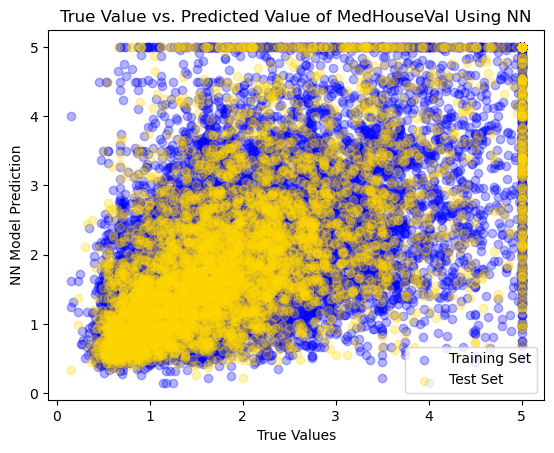

4.
It took 15.824325599998701 seconds to compute the predicted values for test set using NN
5.
The RMSE increases from 1.001 to 1.032614 while the runtime increased to 15.824325599998701 sec from near 0
This indicates that the NN algorithm is worse than the baseline in part 1.4.
The result might be due to the bad feature choice or overfitting due to choose k=1,
the features in this model might do not capture variance in dependent as much as Inland does.
Only choose value according to the nearest neighbor might also lead to failure of capture underlying pattern
It might also be due to bad choice of L.
We will see how NN performs with other sets of features and other values of L in 2.3


In [240]:
# 1.
RMSE_test_NN = compute_rmse(test_pred,cal_df_test_norm[target])
print('1.')
print(f'The RMSE of the test set is {RMSE_test_NN}')

# 2.
RMSE_train_NN = compute_rmse(train_pred,cal_df_train_norm[target])
print('2.')
print(f'The RMSE of the training set is {RMSE_train_NN}')

# 3.
print('3.')
plt.scatter(cal_df_train_norm[target], train_pred, color = 'blue',label = 'Training Set',alpha = 0.3)
plt.scatter(cal_df_test_norm[target], test_pred, color = 'gold',label = 'Test Set',alpha = 0.3)

plt.legend()
plt.title("True Value vs. Predicted Value of MedHouseVal Using NN")
plt.xlabel("True Values")
plt.ylabel("NN Model Prediction")

plt.show()

# 4.
print('4.')
print(f'It took {duration} seconds to compute the predicted values for test set using NN')

# 5.
print('5.')
print(f'The RMSE increases from 1.001 to {RMSE_test_NN} while the runtime increased to {duration} sec from near 0')
print('This indicates that the NN algorithm is worse than the baseline in part 1.4.')
print('The result might be due to the bad feature choice or overfitting due to choose k=1,')
print('the features in this model might do not capture variance in dependent as much as Inland does.')
print('Only choose value according to the nearest neighbor might also lead to failure of capture underlying pattern')
print('It might also be due to bad choice of L.')
print('We will see how NN performs with other sets of features and other values of L in 2.3')
      


### 2.3 Optimization

Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! Use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

**Note:** For this and all subsequent questions, you should use normalized features. 

In [241]:
features2_3 = [['HouseAgeNorm','InlandNorm'],['MedIncNorm','HouseAgeNorm','InlandNorm'],['MedIncNorm','AveRoomsNorm','DistCoastNorm'],\
['MedIncNorm','HouseAgeNorm','AveRoomsNorm','PopulationNorm','DistCoastNorm']]

for i in range(len(features2_3)):
    print(f'Model number {i+1} have the following performance:')
    for j in range(1,4):
        start_time = time.perf_counter()
        test_pred = NN_model(cal_df_test_norm, L = j, feat = features2_3[i])
        duration = time.perf_counter()-start_time
        RMSE_test_NN = compute_rmse(test_pred,cal_df_test_norm[target])
        print(f'With L = {j}, the RMSE is {RMSE_test_NN} and it took {duration} seconds to predict')


Model number 1 have the following performance:
With L = 1, the RMSE is 1.409651 and it took 17.278481799992733 seconds to predict
With L = 2, the RMSE is 1.409651 and it took 17.004288500000257 seconds to predict
With L = 3, the RMSE is 1.409651 and it took 23.54064240003936 seconds to predict
Model number 2 have the following performance:
With L = 1, the RMSE is 0.971679 and it took 16.870137099991553 seconds to predict
With L = 2, the RMSE is 0.969609 and it took 15.88169690000359 seconds to predict
With L = 3, the RMSE is 0.969584 and it took 24.370470000023488 seconds to predict
Model number 3 have the following performance:
With L = 1, the RMSE is 0.923114 and it took 18.38767959998222 seconds to predict
With L = 2, the RMSE is 0.927972 and it took 17.42032299999846 seconds to predict
With L = 3, the RMSE is 0.928799 and it took 25.26485939999111 seconds to predict
Model number 4 have the following performance:
With L = 1, the RMSE is 0.895813 and it took 17.356805599993095 second

According to the output above, among the 4 models that I chose, model number 4 (consisting of 5 variables MedIncNorm, HouseAgeNorm, AveRoomsNorm, PopulationNorm, DistCoastNorm) with L = 2 generates the lowest RMSE of .8906, which is a lot less compare to RMSE in baseline model 2 of 1.4. We could see that the decisions of feature choice do have effect on the running time. First, more features correspond to longer runtime. Second, the choice of feature also have effect on runtime: model 2 and model 3 both have 3 features yet the running time of model 3 is longer, the runtime is dependent on which feature is chosen. The decision of L also have effect on the running time, we could see that generally L1 norm and L2 norm have similar runtime but L3 norm usually takes longer runtime.

### 2.4 K-nearest neighbors algorithm

Now, implement the K-nearest neighbors algorithm and repeat the analysis in 2.1 by using 5 neighbors (`K=5`). The function(s) you write here will be used several more times in this problem set, so do your best to write efficient code! Make sure to do the following:
1. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
2. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
3. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.
4. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
5. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

**Note:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

In [248]:
def KNN_model(covariate, L=2, K=5, feat = features2_2):
    pred = []
    for i in range(covariate.shape[0]):
        abs_diff = np.abs(cal_df_train_norm[feat] - covariate[feat].iloc[i])
        norm = np.sum(abs_diff ** L, axis = 1) ** (1/L)
        if covariate.iloc[i].name == cal_df_train_norm.iloc[i].name:
            norm.iloc[i] = float('inf')

        NN = norm.nsmallest(K).index.tolist()
        predict = np.sum(cal_df_train_norm.loc[NN][target])/K
        pred.append(predict)
    return pred

train_pred = KNN_model(cal_df_train_norm)

In [245]:
start_time = time.perf_counter()
test_pred = KNN_model(cal_df_test_norm)
duration = time.perf_counter()-start_time

1.
The RMSE of the test set is 0.78349
2.
The RMSE of the training set is 0.794189
3.


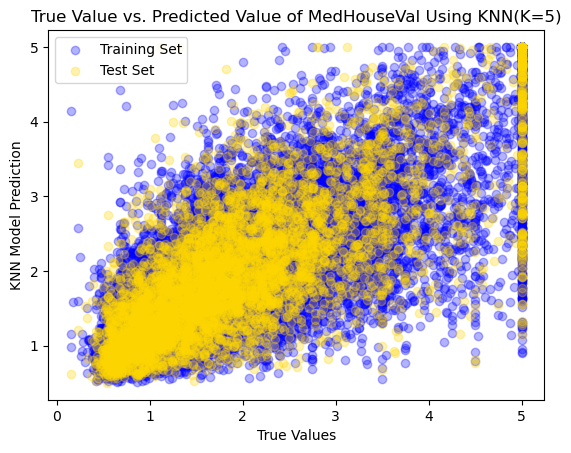

4.
It took 20.666327099956106 seconds to compute the predicted values for test set using KNN
5.
The RMSE decreases from 1.001 to 0.78349 while the runtime increased to 20.666327099956106 sec from near 0
This indicates that the KNN algorithm is slower yet performs better than the baseline in part 1.4.


In [249]:
# 1.
RMSE_test_KNN = compute_rmse(test_pred,cal_df_test_norm[target])
print('1.')
print(f'The RMSE of the test set is {RMSE_test_KNN}')

# 2.
RMSE_train_KNN = compute_rmse(train_pred,cal_df_train_norm[target])
print('2.')
print(f'The RMSE of the training set is {RMSE_train_KNN}')

# 3.
print('3.')
plt.scatter(cal_df_train_norm[target], train_pred, color = 'blue',label = 'Training Set',alpha = 0.3)
plt.scatter(cal_df_test_norm[target], test_pred, color = 'gold',label = 'Test Set',alpha = 0.3)

plt.legend()
plt.title("True Value vs. Predicted Value of MedHouseVal Using KNN(K=5)")
plt.xlabel("True Values")
plt.ylabel("KNN Model Prediction")

plt.show()

# 4.
print('4.')
print(f'It took {duration} seconds to compute the predicted values for test set using KNN')

# 5.
print('5.')
print(f'The RMSE decreases from 1.001 to {RMSE_test_KNN} while the runtime increased to {duration} sec from near 0')
print('This indicates that the KNN algorithm is slower yet performs better than the baseline in part 1.4.')

### 2.5 Cross-Validation

How can we choose K without overfitting? As discussed during lecture time, one possible solution is to use [k-fold cross-validation][1] on the training sample.  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function(s) you write here will be used several more times in this problem set, so do your best to write efficient code! 

Use 20-fold cross-validation and report the average RMSE for your K-nearest neighbors model using Euclidean distance with the same set of features used in 2.3 (`MedIncNorm, HouseAgeNorm and AveRoomsNorm`) and 5 neighbors (`K=5`)  as well as the total running time for the full run of 20 folds.  

In other words, randomly divide your training dataset (created in 1.2) into 20 equally-sized samples. For each of the 20 iterations (the "folds"), use 19 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation.  Compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 20 iterations and compare to the result you obtained in 2.3. What do you observe?
 - Report the runtime of your algorithm.How does it compare to your previous results?

[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

**Note 1:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

**Note 2**: The sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.

**Note 3:** To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [250]:
np.random.seed(1948)

ids = np.arange(0,len(cal_df_train_norm),1)
np.random.shuffle(ids)

partitions = np.array_split(ids,20)
splits2_5 = [cal_df_train_norm.iloc[part] for part in partitions]

def KNN_model_cross(valid, train, L=2, K=5, feat = features2_2):
    pred = []
    for i in range(valid.shape[0]):
        abs_diff = np.abs(train[feat] - valid[feat].iloc[i])
        norm = np.sum(abs_diff ** L, axis = 1) ** (1/L)
        if valid.iloc[i].name == train.iloc[i].name:
            norm.iloc[i] = float('inf')
        
        NN = norm.nsmallest(K).index.tolist()
        predict = np.sum(train.loc[NN][target])/K
        pred.append(predict)
    return pred


In [251]:
Cross_RMSE = []
start_time = time.perf_counter()
for i, _ in enumerate(splits2_5):
    valid = splits2_5[i]
    
    train = pd.concat(splits2_5[:i] + splits2_5[i+1:])
    valid_pred = KNN_model_cross(valid = valid, train = train)
    Cross_RMSE.append(compute_rmse(valid_pred,valid[target]))

duration = time.perf_counter()-start_time

In [234]:
print(np.mean(Cross_RMSE))
print(duration)

0.79309485
64.37034969998058


The average cross-validated RMSE is 0.7931, higher than what I observed in 2.4 where the test RMSE is 0.78349. This illustrates that the cross-validated RMSE might be higher than the actual RMSE in test set. The runtime is 64 sec, which is about the same as the time it takes to do KNN on the whole training set before, much longer than it took to do KNN on only the test set.

### 2.6 Using cross validation to find the optimal value for K

Compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization.  Use the following features in your model: `MedIncNorm, HouseAgeNorm and AveRoomsNorm` .  Create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Finally, "train" a K-nearest neighbor model using the value of K that minimized the cross-validated RMSE and report the test RMSE. (Continue to use L2 normalization and the same set of features). How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? 

**Note:** Runtime should not exceed ~30 min. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

In [252]:
np.random.seed(1948)

ids = np.arange(0,len(cal_df_train_norm),1)
np.random.shuffle(ids)

partitions = np.array_split(ids,10)
splits2_6 = [cal_df_train_norm.iloc[part] for part in partitions]


K_RMSE = []
for i in range(1,26):
    K_RMSE.append([])
    for j, _ in enumerate(splits2_6):
        valid = splits2_6[j]
    
        train = pd.concat(splits2_6[:j] + splits2_6[j+1:])
        valid_pred = KNN_model_cross(valid = valid, train = train, K = i)
        K_RMSE[i-1].append(compute_rmse(valid_pred,valid[target]))



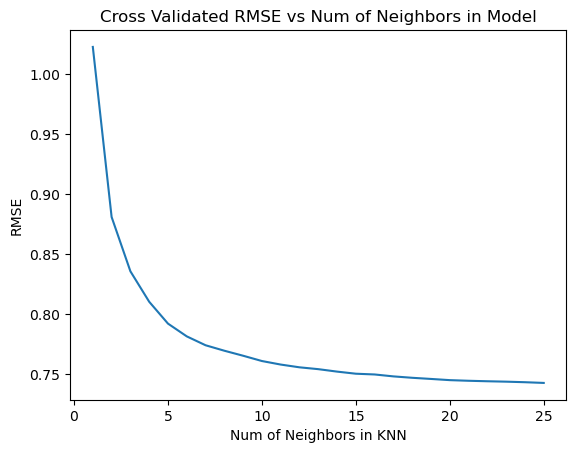

In [253]:
K_RMSE_mean = []
for i in range(len(K_RMSE)):
    K_RMSE_mean.append(np.mean(K_RMSE[i]))

plt.plot(np.arange(1,26,1), K_RMSE_mean)

plt.title('Cross Validated RMSE vs Num of Neighbors in Model')
plt.xlabel('Num of Neighbors in KNN') 
plt.ylabel('RMSE') 

plt.show()

It seems like as K increases, the cross validated RMSE decrease, therefore a reasonable choice of K is 25.

In [254]:
test_pred = KNN_model(cal_df_test_norm, K = 25)
validated_RMSE_test_KNN = compute_rmse(test_pred,cal_df_test_norm[target])

print(validated_RMSE_test_KNN)

0.722949


In [255]:
print(min(K_RMSE_mean))

0.7429062


The test RMSE using K = 25 is 0.7229, which is smaller than the cross-validated RMSE. It might seem counterintuitive but it is expected due to the fact that the test RMSE is generated by a model trained on full training dataset, while the cross-validated models only trained on 19/20 of the full training dataset. More training datapoints helps improve performance of model, and the aforementioned difference in datapoints might be the cause of lower test RMSE from the full model.

---

# Part III: Overfitting in Model Selection and Nested Cross Validation 


In this last part of the problem set, we will examine why overfitting is a serious concern when estimating hyperparameters and how to address it. 

**For this part of the problem set you are allowed to use machine learning libraries. We don't expect you to use your own algorithms developed in part 2.** We strongly suggest that you use the following libraries and resources, but feel free to choose your favorite Python ML libraries.

In [289]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import joblib

For this part of the problem set we will no longer be using the California Housing Dataset. Instead, we will generate our own synthetic data. The advantage of doing so is that we get to choose the data generating process. We will use the knowledge about the data generating process to test the robustness of different approaches to estimating out-of-sample performance.

We will attempt the following classification problem: predict a binary response variable $y \sim Bernoulli(p=1/2)$ from a set of independent features $X=[x_{1},...,x_{J}]$ where $x_{j} \sim Unif(a=0,b=1)$, $1 \leq j \leq J$. 

You can use the following function to generate samples from this distribution.

In [290]:
def generate_random_sample(nobs,J):
    X = pd.DataFrame(np.random.random_sample(size=(nobs, J)), columns=[f'feature_{x}' for x in range(J)])
    y = np.random.binomial(n=1,p=1/2,size=nobs)
    return X,y

X_train,y_train = generate_random_sample(nobs=2*10**3,J=100)

### 3.1 Out-of-sample performance

We are going to be using the area under the ROC curve (AUC-ROC) as the evaluation score. What kind of out-of-sample performance would you expect from classification models trained and tested on this data? Test whether your intuition is correct by carrying out the following iterative procedure:

1. For each iteration in 1,2,3,...,50:
    * Generate a training sample containing 2,000 observations and J=100 features. Likewise, generate a test sample containing 200 observations and J=100 features. 
    * Train some K-nearest neighbors model on the training sample with some arbitrary choice of K (no need to cross validate the choice of K or put any work into it, we'll get to that later on).
    * Evaluate the AUC-ROC on the test set.
2. Plot a histogram of the test AUC-ROC scores.
3. Report the average of the test AUC-ROC scores.

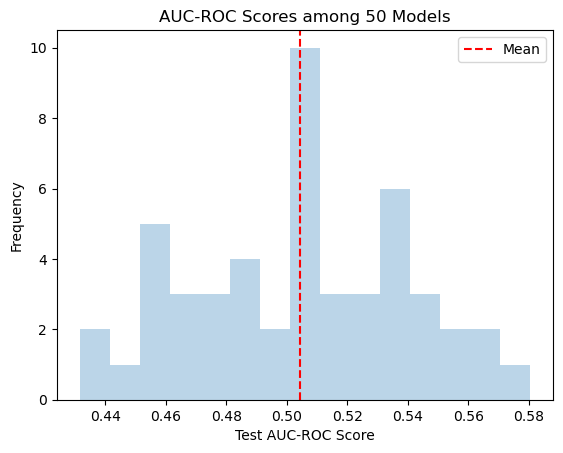

The average of the test AUC-ROC scores is 0.5043546027308445


In [291]:
# 1.
np.random.seed(1948)

auc = []
for i in range(1,51):
    train_feat, train_target = generate_random_sample(nobs=2000,J=100)
    test_feat, test_target = generate_random_sample(nobs=200,J=100)

    model = KNeighborsClassifier(n_neighbors= 7)
    model.fit(train_feat,train_target)

    pred_test = model.predict_proba(test_feat)[:,1]
    auc.append(roc_auc_score(y_true=test_target, y_score=pred_test))

plt.hist(auc, bins = 15, alpha = 0.3)
plt.xlabel('Test AUC-ROC Score')
plt.ylabel('Frequency')

plt.axvline(np.mean(auc), color='r', linestyle='dashed', label='Mean')
plt.legend()

plt.title('AUC-ROC Scores among 50 Models')
plt.show()

print(f'The average of the test AUC-ROC scores is {np.mean(auc)}')

### Fix a sample

In real life settings we wouldn't be able to draw test and train samples at will. For the rest of the pset (3.2-3.6) we will fix a training and test sample:

In [294]:
np.random.seed(1948)
X_train,y_train = generate_random_sample(nobs=2*10**3,J=100)
X_test,y_test = generate_random_sample(nobs=2*10**2,J=100)

### 3.2 k-fold cross-validation 
Use 10-fold cross-validation on the train sample to find the optimal K and report the hyperparameter value. Report also the average of the cross validated scores for the optimal hyperparameter value. 

In [295]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
model.fit(X_train, y_train)

optimal = model.best_params_['n_neighbors']

print(f'The optimal K value is {optimal}')

print(f'The average ROC-AUC with K = {optimal} is: {model.best_score_}')

The optimal K value is 2
The average ROC-AUC with K = 2 is: 0.5075551447701793


### 3.3 Nested cross-validation

Use nested cross validation ([3],[4],[5],[6]) on the training sample. In the outer loop you should be estimating model performance and in the inner loop you should be doing regular k-fold cross validation to find the optimal K. Use 10 folds for the inner cv and 3 folds for the outer cv. Report the average of the cross-validated scores of the outer loop.

[3]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
[4]: https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html#:~:text=As%20a%20conclusion%2C%20when%20optimizing,validation%20are%20often%20overly%20optimistic.
[5]: https://stats.stackexchange.com/questions/65128/nested-cross-validation-for-model-selection/65156#65156
[6]: https://stats.stackexchange.com/questions/232897/how-to-build-the-final-model-and-tune-probability-threshold-after-nested-cross-v/233027#233027

In [296]:
inner_cv = KFold(n_splits=10, shuffle=True, random_state=1948)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=1948)

model = GridSearchCV(estimator=knn, param_grid=param_grid, cv=inner_cv, scoring = 'roc_auc')

test_score = cross_val_score(model, X_train, y_train, cv=outer_cv)
print(f'The average of the cross-validated scores of the outer loop is {np.mean(test_score)}')

The average of the cross-validated scores of the outer loop is 0.4931239074019149


### 3.4 Take stock of the results so far

Based on the results of 3.1, 3.2 and 3.3, what can you say about estimating out-of-sample performance? Is the average of the cross-validated scores a good estimator? How about the average of the nested cross-validated scores? Are they underestimating or overestimating true out-of-sample performance?

All 3 results above give an estimation of out-of-sample performance close to 0.5 (3.1: 0.5044, 3.2: 0.5076, 3.3:0.4931). They are close to the true value of 0.5 since we know that features and target is independent. The estimator in 3.1 is the best yet generating data is not possible in real-life setting. Both the mean cross-validated score and the mean nested cross-validated score are worse than estimator in 3.1. The average of the nested cross-validated scores is slightly better than the average of the cross-validated scores since it is closer to 0.5. The average cross-validated score overestimates, and the average nested cross-validated score underestimates the true value.

### 3.5 Comparing k-fold and nested cross-validation [extra-credit]

We would like to better assess the difference between the k-fold and nested cross-validation scores and make sure that the results we observed in 3.2 and 3.3 are not a fluke. To do this, repeat both experiments 50 times. In each iteration, pass a different value for the "random_state" parameter in the KFold function to ensure that there is variation in the fold splitting. 

In a single figure, plot two histograms. One showing the distribution of the k-fold scores, another showing the distribution of the nested scores. Use gold for the color of the objects related to the nested scores and blue for the color of the objects related to the k-fold scores. 

**Note 1**: you should NOT be generating a new sample -- continue working with the dataset fixed ahead of question 3.2.

**Note 2**: Runtime should not exceed 30 min. If its taking longer then we strongly suggest you go back to your code and make it more efficient.

In [298]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()

n = 50
k_fold = []
nested = []

for i in range(n):
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i*2)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i*2)

    model = GridSearchCV(estimator=knn, param_grid=param_grid, cv=inner_cv, scoring = 'roc_auc')
    test_score = cross_val_score(model, X_train, y_train, cv=outer_cv)
    nested.append(np.mean(test_score))
    model.fit(X_train,y_train)
    k_fold.append(model.best_score_)


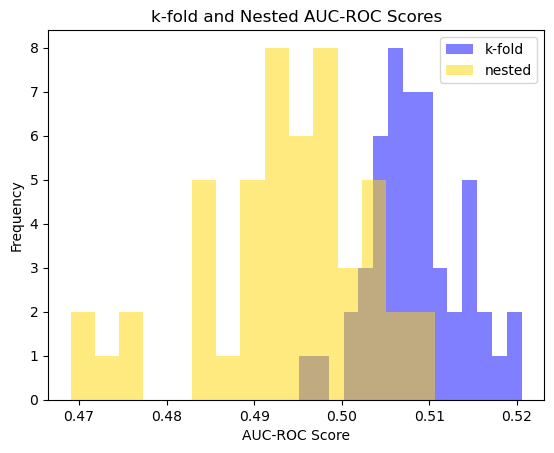

In [300]:
plt.hist(k_fold, bins = 15, alpha = 0.5, color = 'blue',label = 'k-fold')
plt.hist(nested, bins = 15, alpha = 0.5, color = 'gold',label = 'nested')
plt.xlabel('AUC-ROC Score')
plt.ylabel('Frequency')

plt.legend()

plt.title('k-fold and Nested AUC-ROC Scores')
plt.show()

### 3.6 Conclusion [extra-credit]

Based on the figure from 3.5, would you adjust your answer to question 3.4? In a couple of sentences, explain why overfitting can arise when doing model selection, and why nested cross-validation is a useful tool in preventing it. 

The figure of 3.5 is consistent with my answer in 3.4, the k-fold scores overestimates the performance and the nested scores is spread out more evenly. The reason that k-fold scores overestimates performance is because its selection process would use the same set for validation and testing, hence the model more adjusted to noise in training set would be more likely to be chosen as the optimal model and overfitting would arise. Nested cross-validation only do model selection in inner loop, the assessment of performance is in outer loop on another set not used to do model selection, so it could prevent overfitting.